### <center> CCT College Dublin
# <center> Assessment Cover Page

<br><br><br>

### Module Title:
Data Visualization Techniques, Machine Learning for Business

### Assessment Title:
CA 2

### Student Details:
- **Full Name:**&nbsp;&nbsp;&nbsp; Yumiko Maria Bejarano Azogue  
- **Student Number:**&nbsp;&nbsp;&nbsp; 2024144  
- **Date of Submission:**&nbsp;&nbsp;&nbsp;24 Nov 2024
  
<br><br><br>

---
    
## GITHUB
https://github.com/CCT-College-Dublin/integrated-ca2-50-YumikoBejarano
<br><br><br>

In [1]:
import pandas as pd
import numpy as np

import random

from sklearn.impute import SimpleImputer

from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import warnings

# Ignore warnings 
warnings.filterwarnings("ignore")

# Question 1: Recommendation system for an online sales business

## 1. Data preparation

In [2]:
# List of CSV file names
csvs = ['olist_order_items_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_orders_dataset.csv',
        'olist_products_dataset.csv']

# Load dataset
dfs = []
for file in csvs:
    df = pd.read_csv(file) 
    # df = pd.read_csv(file, nrows=10000)  # Load only the first 10,000 rows
    dfs.append(df)

# Merge the data using appropriate keys
df_merged = dfs[0].merge(dfs[2], on='order_id', how='outer').merge(dfs[1], on='order_id', how='outer')
df_merged = df_merged.merge(dfs[3], on='product_id', how='outer')

df_merged

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,review_creation_date,review_answer_timestamp,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,f30149f4a8882a08895b6a242aa0d612,1.0,00066f42aeeb9f3007548bb9d3f33c38,5670f4db5b62c43d542e1b2d56b0cf7c,2018-05-24 18:58:59,101.65,18.59,86c180c33f454b35e1596a99da3dddc4,delivered,2018-05-20 18:45:21,...,2018-06-07 00:00:00,2018-06-08 10:59:20,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,f5eda0ded77c1293b04c953138c8331d,1.0,00088930e925c41fd95ebfe695fd2655,7142540dd4c91e2237acb7e911c4eba2,2017-12-18 19:32:19,129.90,13.93,68f2b37558e27791155db34bcded5ac0,delivered,2017-12-12 19:20:28,...,2017-12-24 00:00:00,2017-12-27 13:23:27,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0bf736fd0fd5169d60de3699fcbcf986,1.0,0009406fd7479715e4bef61dd91f2462,4a3ca9315b744ce9f8e9374361493884,2017-12-29 16:12:36,229.00,13.10,6cd217b674e22cf568f6a2cf6060fd07,delivered,2017-12-21 16:21:47,...,2018-01-07 00:00:00,2018-01-11 11:03:53,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,3aba44d8e554ab4bb8c09f6f78032ca8,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-16 13:35:21,58.90,19.60,82b838f513e00463174cc7cae7e76c1f,delivered,2018-08-10 13:24:35,...,2018-08-18 00:00:00,2018-08-22 12:40:29,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,6f0dfb5b5398b271cc6bbd9ee263530e,1.0,000b8f95fcb9e0096488278317764d19,40ec8ab6cdafbcc4f544da38c67da39a,2018-08-07 22:15:19,58.90,19.60,8517e7c86998bf39a540087da6f115d9,delivered,2018-08-01 22:00:33,...,2018-08-08 00:00:00,2018-08-08 23:48:48,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114087,fdcca0e15a4d03e3fb89fb14664a3744,NaN,NaN,NaN,NaN,NaN,NaN,58ee086556a160d66dc3f6d43b4efcc3,unavailable,2017-09-11 20:02:08,...,2017-10-04 00:00:00,2017-10-07 19:42:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114088,fddbd183387b5c9bcbafbd0fe965301f,NaN,NaN,NaN,NaN,NaN,NaN,bade46d49478a63c01dca6a9ae49dfa9,unavailable,2017-09-23 10:25:00,...,2017-10-21 00:00:00,2017-10-21 13:54:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114089,fe87d4b944748f63ca5ed22cc55b6fb6,NaN,NaN,NaN,NaN,NaN,NaN,d992eb012e1599214218191d39c99693,unavailable,2017-12-05 09:20:36,...,2017-12-22 00:00:00,2017-12-22 09:19:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114090,feae5ecdf2cc16c1007741be785fe3cd,NaN,NaN,NaN,NaN,NaN,NaN,ca05f8b53b1ad2a64bf34baa8aa7f4f6,unavailable,2017-11-11 16:41:06,...,2017-11-29 00:00:00,2017-11-29 11:49:44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# df_selected = df_merged[['customer_id', 'product_id', 'product_category_name', 'price',
df_selected = df_merged[['customer_id', 'product_id', 'price', 'freight_value',
                         'product_weight_g', 'product_length_cm', 'product_height_cm', 
                         'product_width_cm', 'review_score']]

# Delete rows with NaN in the relevant columns
columns_to_check = ['product_id', 'review_score']
df = df_selected.dropna(subset=columns_to_check)

df = df.drop_duplicates()

df

,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,86c180c33f454b35e1596a99da3dddc4,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0,5.0
1,68f2b37558e27791155db34bcded5ac0,00088930e925c41fd95ebfe695fd2655,129.90,13.93,1225.0,55.0,10.0,26.0,4.0
2,6cd217b674e22cf568f6a2cf6060fd07,0009406fd7479715e4bef61dd91f2462,229.00,13.10,300.0,45.0,15.0,35.0,1.0
3,82b838f513e00463174cc7cae7e76c1f,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
4,8517e7c86998bf39a540087da6f115d9,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...
113309,839b3007f7e5aee8f8eb130c8fa51c29,fffdb2d0ec8d6a61f0a0a0db3f25b441,29.99,18.23,150.0,16.0,4.0,13.0,5.0
113310,d14930bf3da4e0ba5a02cc8d6ac80f6e,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,18.23,150.0,16.0,4.0,13.0,5.0
113311,550ccac77275f9cdec4b6cd97ac118d0,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.51,150.0,16.0,4.0,13.0,5.0
113312,35e8f2cff4eeed925cfa42f6731a4425,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.39,150.0,16.0,4.0,13.0,5.0


In [4]:
# Select specific columns
df_selected = df_merged[['customer_id', 'product_id', 'price', 'freight_value',
                         'product_weight_g', 'product_length_cm', 'product_height_cm', 
                         'product_width_cm', 'review_score']]

# Delete rows with NaN in the relevant columns
columns_to_check = ['product_id', 'review_score']
df = df_selected.dropna(subset=columns_to_check)

# Remove duplicates
df = df.drop_duplicates()
df = df.dropna()

print(df.describe())

df_original = df.copy()

df_original

               price  freight_value  product_weight_g  product_length_cm  \
count  101839.000000  101839.000000     101839.000000      101839.000000   
mean      124.181618      20.105258       2088.100394          30.080058   
std       187.424453      15.871845       3747.771958          16.089313   
min         0.850000       0.000000          0.000000           7.000000   
25%        40.000000      13.140000        300.000000          18.000000   
50%        78.710000      16.320000        700.000000          25.000000   
75%       139.000000      21.200000       1800.000000          38.000000   
max      6735.000000     409.680000      40425.000000         105.000000   

       product_height_cm  product_width_cm   review_score  
count      101839.000000     101839.000000  101839.000000  
mean           16.399837         23.037589       4.075266  
std            13.310816         11.742937       1.354300  
min             2.000000          6.000000       1.000000  
25%            

,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,86c180c33f454b35e1596a99da3dddc4,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0,5.0
1,68f2b37558e27791155db34bcded5ac0,00088930e925c41fd95ebfe695fd2655,129.90,13.93,1225.0,55.0,10.0,26.0,4.0
2,6cd217b674e22cf568f6a2cf6060fd07,0009406fd7479715e4bef61dd91f2462,229.00,13.10,300.0,45.0,15.0,35.0,1.0
3,82b838f513e00463174cc7cae7e76c1f,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
4,8517e7c86998bf39a540087da6f115d9,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...
113309,839b3007f7e5aee8f8eb130c8fa51c29,fffdb2d0ec8d6a61f0a0a0db3f25b441,29.99,18.23,150.0,16.0,4.0,13.0,5.0
113310,d14930bf3da4e0ba5a02cc8d6ac80f6e,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,18.23,150.0,16.0,4.0,13.0,5.0
113311,550ccac77275f9cdec4b6cd97ac118d0,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.51,150.0,16.0,4.0,13.0,5.0
113312,35e8f2cff4eeed925cfa42f6731a4425,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.39,150.0,16.0,4.0,13.0,5.0


In [5]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101839 entries, 0 to 113313
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        101839 non-null  object 
 1   product_id         101839 non-null  object 
 2   price              101839 non-null  float64
 3   freight_value      101839 non-null  float64
 4   product_weight_g   101839 non-null  float64
 5   product_length_cm  101839 non-null  float64
 6   product_height_cm  101839 non-null  float64
 7   product_width_cm   101839 non-null  float64
 8   review_score       101839 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.8+ MB


The code above loads multiple CSV files into a DataFrame using the pandas library and combines them into a single dataset.

Then, it merges several of these DataFrames using common keys like order_id and product_id. After that, it selects specific columns from the combined DataFrame, such as customer_id, product_id, price, and others. Next, it removes rows with null values in the product_id and review_score columns. Finally, it deletes duplicate rows, resulting in a clean and duplicate-free DataFrame.

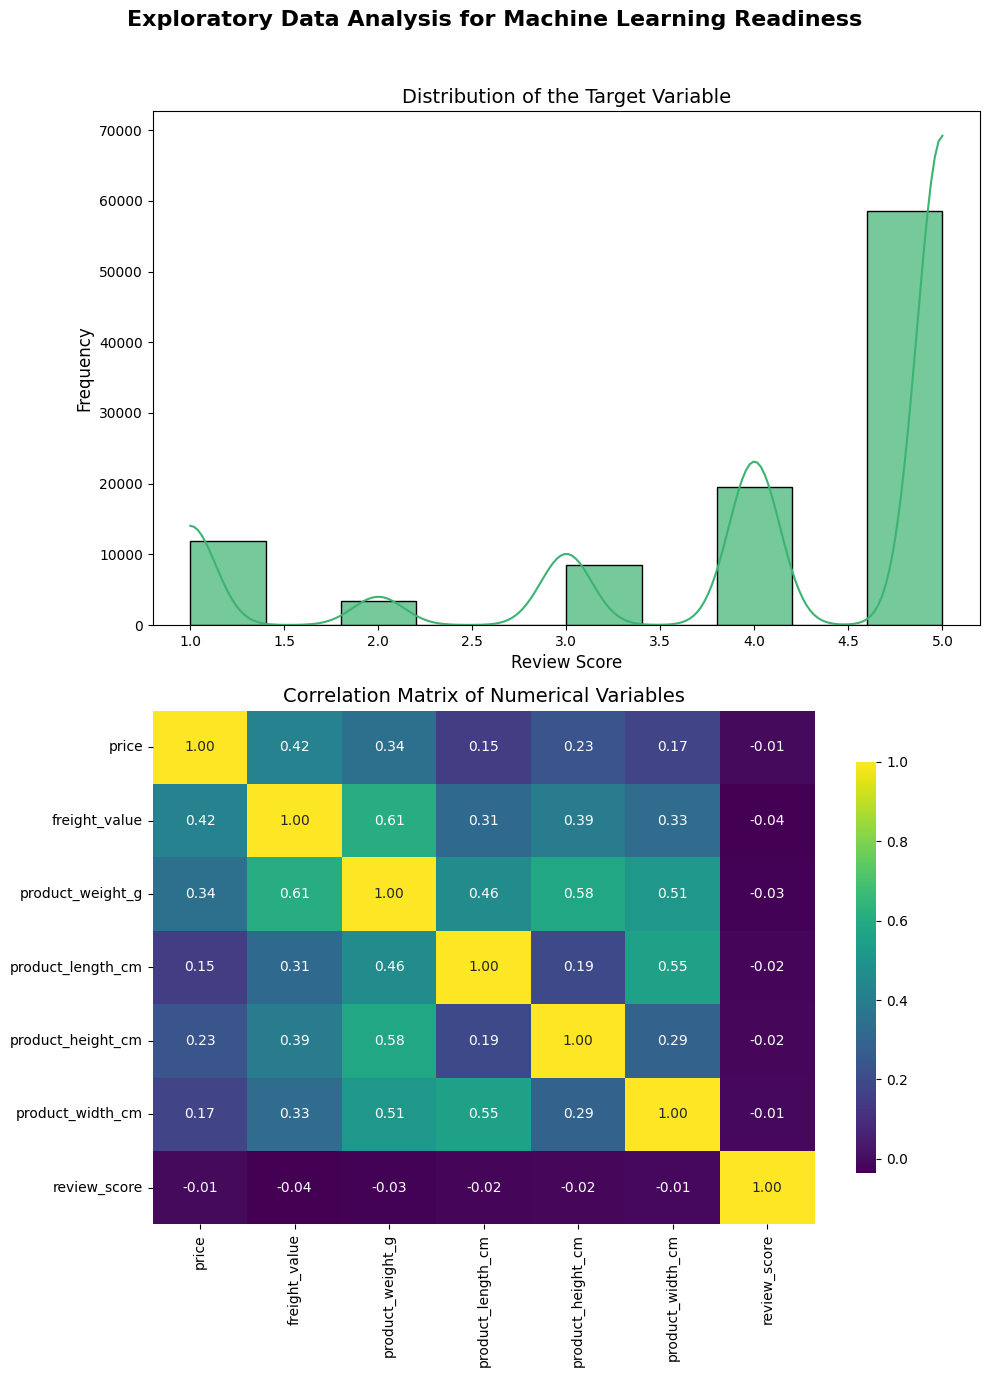

In [6]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Filter numerical columns from the dataset
numerical_columns = df_original.select_dtypes(include=['number'])

# Create a figure with two vertically stacked subplots
fig_eda, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 14))
plt.subplots_adjust(hspace=0.5)  # Adjust spacing between plots

# Use the Viridis color palette for a modern and vibrant look
viridis_palette = sns.color_palette("viridis", as_cmap=True)

# Plot 1: Distribution of the target variable
sns.histplot(df_original['review_score'], kde=True, bins=10, ax=ax1, color='mediumseagreen', alpha=0.7)
ax1.set_title('Distribution of the Target Variable', fontsize=14)
ax1.set_xlabel('Review Score', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# Plot 2: Correlation matrix for numerical variables
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=viridis_palette, ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Correlation Matrix of Numerical Variables', fontsize=14)

# Add a general title for the figure
fig_eda.suptitle('Exploratory Data Analysis for Machine Learning Readiness', fontsize=16, fontweight='bold')

# Adjust layout to avoid overlap between elements
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Display the plots
plt.show()



Distribution of the Target Variable:
The histogram shows that the ratings (review_score) are mostly high, with peaks at 4.5 and 5.0, reflecting positive customer satisfaction. Low ratings (between 1.0 and 2.0) are rare, confirming the overall quality of the products. This distribution proves that the dataset has relevant and balanced information to analyze customer behavior.

Correlation Matrix:
The heatmap highlights relationships between numerical variables, such as weight and product dimensions, which are moderately correlated, showing consistency in the data. Ratings (review_score) do not show significant correlations with variables like price or dimensions, indicating that review factors are varied and complex, ideal for machine learning models.

Conclusion:
These charts confirm that the dataset is suitable for applying machine learning models in an online sales business. The positive distribution of ratings and relationships between key variables provide a strong foundation for building effective predictive models to support strategic decisions.


#################


Distribución de la Variable Objetivo:
El histograma muestra que las calificaciones (review_score) están concentradas en valores altos, con picos en 4.5 y 5.0, reflejando una tendencia positiva en la satisfacción de los clientes. La baja frecuencia de calificaciones entre 1.0 y 2.0 refuerza la calidad general de los productos. Esta distribución demuestra que el conjunto de datos contiene información relevante y equilibrada para analizar el comportamiento de los clientes.

Matriz de Correlación:
El mapa de calor destaca relaciones entre variables numéricas como el peso y las dimensiones de los productos, que están moderadamente correlacionados, indicando consistencia en los datos. Las calificaciones (review_score) no tienen correlaciones significativas con variables como el precio o las dimensiones, lo que sugiere que los factores que influyen en las reseñas son variados y complejos, ideales para explorar con modelos de aprendizaje automático.

Conclusión:
Estos gráficos confirman que el conjunto de datos es adecuado para aplicar modelos de aprendizaje automático en un negocio de venta en línea. La distribución positiva de las calificaciones y las relaciones entre variables clave brindan una base sólida para diseñar modelos predictivos efectivos que impulsen decisiones estratégicas basadas en datos.

In [7]:
# Check for Null Values
df.isnull().sum()

customer_id          0
product_id           0
price                0
freight_value        0
product_weight_g     0
product_length_cm    0
product_height_cm    0
product_width_cm     0
review_score         0
dtype: int64

In [8]:
# Statistical summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 101839 entries, 0 to 113313
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   customer_id        101839 non-null  object 
 1   product_id         101839 non-null  object 
 2   price              101839 non-null  float64
 3   freight_value      101839 non-null  float64
 4   product_weight_g   101839 non-null  float64
 5   product_length_cm  101839 non-null  float64
 6   product_height_cm  101839 non-null  float64
 7   product_width_cm   101839 non-null  float64
 8   review_score       101839 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.8+ MB


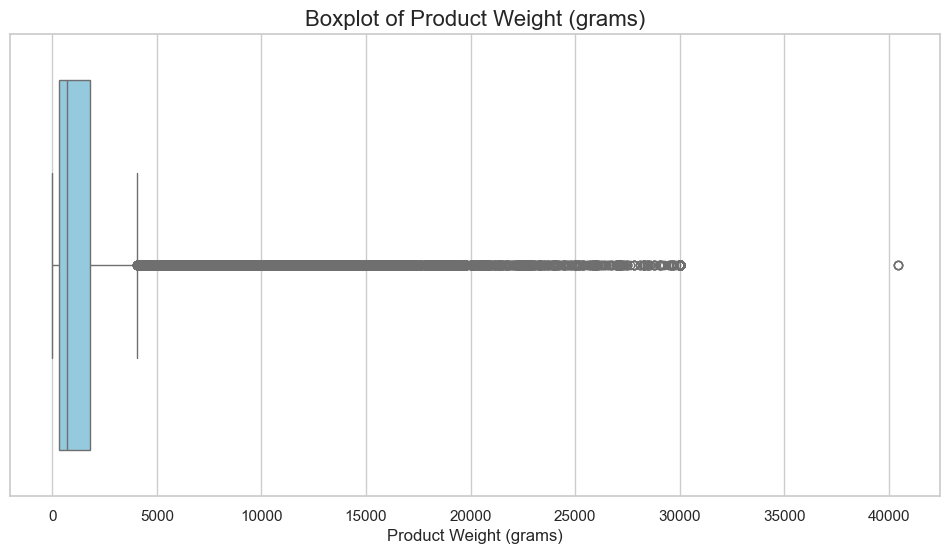

In [9]:
# Outlier Analysis with Improved Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['product_weight_g'], color='skyblue')

# Add titles and labels
plt.title('Boxplot of Product Weight (grams)', fontsize=16)
plt.xlabel('Product Weight (grams)', fontsize=12)

# Display the plot
plt.show()


In [10]:
# Remove outliers
q_high = df['product_weight_g'].quantile(0.95)
df = df[df['product_weight_g'] < q_high]
df


,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
0,86c180c33f454b35e1596a99da3dddc4,00066f42aeeb9f3007548bb9d3f33c38,101.65,18.59,300.0,20.0,16.0,16.0,5.0
1,68f2b37558e27791155db34bcded5ac0,00088930e925c41fd95ebfe695fd2655,129.90,13.93,1225.0,55.0,10.0,26.0,4.0
2,6cd217b674e22cf568f6a2cf6060fd07,0009406fd7479715e4bef61dd91f2462,229.00,13.10,300.0,45.0,15.0,35.0,1.0
3,82b838f513e00463174cc7cae7e76c1f,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
4,8517e7c86998bf39a540087da6f115d9,000b8f95fcb9e0096488278317764d19,58.90,19.60,550.0,19.0,24.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...
113309,839b3007f7e5aee8f8eb130c8fa51c29,fffdb2d0ec8d6a61f0a0a0db3f25b441,29.99,18.23,150.0,16.0,4.0,13.0,5.0
113310,d14930bf3da4e0ba5a02cc8d6ac80f6e,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,18.23,150.0,16.0,4.0,13.0,5.0
113311,550ccac77275f9cdec4b6cd97ac118d0,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.51,150.0,16.0,4.0,13.0,5.0
113312,35e8f2cff4eeed925cfa42f6731a4425,fffdb2d0ec8d6a61f0a0a0db3f25b441,34.99,7.39,150.0,16.0,4.0,13.0,5.0


## 2. Preprocessing and Data Preparation

In [11]:
# ------- Preprocessing -------

# Define numerical and categorical columns
numerical_cols = ['price', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm', 'review_score']
categorical_cols = ['customer_id', 'product_id']

# Create a copy of the original DataFrame to avoid modifying it directly
df_copy = df.copy()

# Preprocessing numerical features: Imputation + Scaling
# Impute missing numerical values with the median (more robust to outliers)
num_imputer = SimpleImputer(strategy='median')
df_copy[numerical_cols] = num_imputer.fit_transform(df_copy[numerical_cols])

# Normalize numerical features using StandardScaler
scaler = StandardScaler()
df_copy[numerical_cols] = scaler.fit_transform(df_copy[numerical_cols])

# Preprocessing categorical features: Label Encoding
#  Impute missing categorical values with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
df_copy[categorical_cols] = cat_imputer.fit_transform(df_copy[categorical_cols])

#  Encode categorical features using LabelEncoder
label_encoder_customer = LabelEncoder()
label_encoder_product = LabelEncoder()

df_copy['customer_id_map'] = label_encoder_customer.fit_transform(df_copy['customer_id'])
df_copy['product_id_map'] = label_encoder_product.fit_transform(df_copy['product_id'])


The code performs preprocessing on the data from a DataFrame df_copy. 
First, it imputes missing values in the numerical columns (such as 'price', 'product_weight_g', and 'review_score') using the median value to handle outliers effectively. Then, it normalizes these numerical features using StandardScaler, ensuring they have a mean of 0 and a standard deviation of 1.
Next, it imputes missing values in the categorical columns ('customer_id' and 'product_id') with the most frequent value to maintain consistency.
Finally, it label-encodes these categorical columns to convert them into numerical values, creating 'customer_id_map' and 'product_id_map' columns, while retaining the original categorical columns.



In [12]:
# -------  Data Preparation -------

# Sort the DataFrame by 'customer_id_map' for better organization
df_copy = df_copy.sort_values(by='customer_id_map')

# Fill any remaining missing values with 0 (as a final fallback)
df_copy = df_copy.fillna(0)

# Display the first few rows of the preprocessed DataFrame
df_copy

,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,customer_id_map,product_id_map
45624,00012a2ce6f8dcda20d059ce98491703,64315bd8c0c47303179dd2e25b579d00,-0.142364,24.94,1.521043,1.136094,2.163848,-0.012257,-2.286989,0,12101
59444,000161a058600d5901f007fab4c27140,84183944dc7cddca87a5d384452c1d3c,-0.358101,12.51,-0.653814,-0.861995,-1.174764,-1.037221,-0.062459,1,15947
70125,0001fd6190edaaf884bcaf3d49edf079,9df2b21ec85378d71df4404712e17478,0.415153,15.43,-0.336857,-0.528980,0.720124,1.199063,0.679051,2,18998
78131,0002414f95344307404f0ace7a26f1d5,af3ec22cce878225aae6d9eb6c7a78eb,0.229150,29.45,0.112167,0.736477,0.810357,0.733171,0.679051,3,21001
60233,000379cdec625522490c315e70c7a9fb,868b3136c5b206f91b8208fbfdf2cb7c,-0.122583,14.01,-0.310443,1.069491,-0.452902,1.105885,-0.062459,4,16210
...,...,...,...,...,...,...,...,...,...,...,...
19891,fffcb937e9dd47a13f05ecb8290f4d3e,2eb705094d8383cfa50e8965dddc8a7e,-0.215306,13.91,-0.072725,-0.062759,-0.904066,-0.012257,0.679051,92931,5674
85238,fffecc9f79fd8c764f843e9951b11341,c045b19fdb30a3035c56d04c6fe2e622,-0.358101,26.46,0.349885,1.402506,-0.452902,1.664956,-0.803969,92932,23102
95306,fffeda5b6d849fbd39689bb92087f431,d5c263f4d651ba657c900ce70a4be7de,-0.401372,15.23,-0.548162,-0.595583,1.351753,-0.198614,-0.062459,92933,25758
102055,ffff42319e9b2d713724ae527742af25,e61c78a7343d82c0539d27df0f7dfc31,0.538229,14.23,0.693256,0.803079,-0.633368,1.292242,0.679051,92934,27683


The below prepares the DataFrame for further analysis or modeling.
It sorts the DataFrame by 'customer_id_map' for better organization, which can be useful for analyzing patterns by customer.
Finally, it fills any remaining missing values with 0 as a fallback to ensure no NaN values are present.

## Filtered by content

In [13]:
df= df_copy.copy()

In [14]:
# ------- Feature Selection and Preprocessing Pipeline -------

# Select feature columns for the KNN model
features = ['price', 'freight_value', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Define preprocessing for numerical features: scaling using StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), features)
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

# Create a pipeline that includes preprocessing and the KNN model
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', NearestNeighbors(n_neighbors=11, metric='euclidean', n_jobs=-1))
])

# Fit the pipeline to the feature data
X = df[features]
knn_pipeline.fit(X)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['price', 'freight_value',
                                                   'product_weight_g',
                                                   'product_length_cm',
                                                   'product_height_cm',
                                                   'product_width_cm'])])),
                ('knn',
                 NearestNeighbors(metric='euclidean', n_jobs=-1,
                                  n_neighbors=11))])

Feature Selection and KNN Initialization:

This section selects the relevant features from the DataFrame (df) to train the K-Nearest Neighbors (KNN) model. The selected features include price, freight_value, product_weight_g, among others. Then, a KNN model is initialized, configured to find the 10 nearest neighbors for each product using Euclidean distance as the metric. This allows the identification of similar products based on the selected features, which is essential for generating similarity-based recommendations.





In [15]:
# ------- Select User and Product -------

# Select a random user from the dataset and get their purchased products
user_id = random.choice(df['customer_id_map'].unique())  # Randomly select a user ID
user_products = df[df['customer_id_map'] == user_id]  # Get all products purchased by the user

# Select a random product from the user's list of purchased products
product_id = random.choice(user_products['product_id_map'].unique())
real_user_id = user_products['customer_id'].iloc[0]  # Original user ID
real_product_id = user_products[user_products['product_id_map'] == product_id]['product_id'].iloc[0]  # Original product ID

# Print purchased products for the selected user
print(f"\nRelevant (purchased) products by user {real_user_id}:")
print(user_products['product_id'].unique())


Relevant (purchased) products by user 39dea79a06151bc11ae1cbad542257fa:
['fc7138a8f96aee8302e42916bbbbb818']


User and Product Selection:

In this section, a random user is selected from the dataset, and a list of products purchased by that user is retrieved. A random product from the user's purchased products is then selected. This product is used as a reference to find similar products in the next section. This random selection emulates a real-world recommendation scenario, where the system suggests products similar to one a specific user has already purchased.




In [16]:
# ------- Find Similar Products Using KNN -------

# Ensure only the feature columns are used for finding similar products
selected_product_features = X.iloc[product_id].values.reshape(1, -1)
distances, indices = knn_pipeline.named_steps['knn'].kneighbors(selected_product_features)

# Initialize lists to store similar products and their ratings
similar_products = []  # Store information about similar products
actual_ratings = []  # Store actual ratings of similar products
predicted_ratings = []  # Store predicted ratings for similar products

# Display information about similar products
print(f"\nSimilar products to product index {product_id} ({real_product_id}):\n")
for i in range(1, len(indices.flatten())):  # Start from 1 to exclude the base product itself
    similar_index = indices.flatten()[i]
    similar_product_id = df.iloc[similar_index]['product_id']
    distance = distances.flatten()[i]
    print(f"Product {similar_product_id} with a distance of {distance:.6f}")
    
    # Add the similar product to the list
    similar_products.append(df.iloc[similar_index])
    
    # Assume that the actual rating is available in 'review_score'
    actual_rating = df.iloc[similar_index]['review_score']
    actual_ratings.append(actual_rating)
    
    # Predict the rating inversely proportional to the distance (closer products have higher predicted ratings)
    predicted_rating = 1 / (1 + distance)  # Normalize based on distance
    predicted_ratings.append(predicted_rating)



Similar products to product index 30354 (fc7138a8f96aee8302e42916bbbbb818):

Product c4d513d82ef46690cc4bedd562795aa3 with a distance of 2.790831
Product 482c25dc8512547962854dfff5ac057b with a distance of 3.749968
Product 2b4609f8948be18874494203496bc318 with a distance of 3.900463
Product 6642e66f26b6e23817ada36eeae229bc with a distance of 3.976840
Product 2ccd049c8e7ea210e079a1aa8ad92477 with a distance of 3.991374
Product fe4dece0c663ba4f1f9f2d04d3b93a97 with a distance of 4.399756
Product 5cac6a83708526b99c11e11027ae1ca6 with a distance of 4.467686
Product baf25ed4f8f70238cc87230379471454 with a distance of 4.468924
Product 41751736c87d2da5af7c27168bf45a9d with a distance of 4.476178
Product 0c11029e1f747d21ae2f131082236d7d with a distance of 4.520701


Finding Similar Products Using KNN:

The previously trained KNN model is used to find products similar to the user-selected product. The distances of the 10 closest products to the target product (excluding the base product itself) are calculated. These similar products are stored in a list, along with their actual and predicted ratings. The predicted rating for each product is inversely proportional to the distance from the original product, meaning that closer products tend to have higher predicted ratings.



In [17]:
# ------- Create DataFrame for Similar Products -------

# Create a DataFrame of similar products for visualization
df_similar = pd.DataFrame(similar_products)

# Inverse transform the scaled features for better interpretation
df_similar[features] = knn_pipeline.named_steps['preprocessor'].transformers_[0][1].inverse_transform(df_similar[features])

# Drop unnecessary columns related to mapping
df_similar = df_similar.drop(['customer_id_map', 'product_id_map'], axis=1)

df_similar

,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
87294,20994cde97d1b4009a539595342ce5e5,c4d513d82ef46690cc4bedd562795aa3,0.847308,1449.215523,0.121147,-0.329171,1.081055,-0.291793,0.679051
32885,ddbd5d378c4a0981ba1ef29fb8e40b8f,482c25dc8512547962854dfff5ac057b,0.649188,1412.074817,-0.445679,-0.462377,-0.182204,-0.384971,-2.286989
18571,2bb90453c5b070eeacd965903f376375,2b4609f8948be18874494203496bc318,-0.203005,2012.015299,-0.600988,-0.462377,-0.452902,-0.384971,-0.062459
46623,34327f03d06c475e8579bc13c6283116,6642e66f26b6e23817ada36eeae229bc,0.569075,1390.391515,-0.648532,-0.795392,-0.272437,-0.664507,0.679051
19306,a25857c3cf17484ba12fa43b8bab8685,2ccd049c8e7ea210e079a1aa8ad92477,-0.209125,1526.717228,2.911959,-0.062759,3.607573,1.385420,0.679051
112580,449150a1b645337bcbe7ba5cdb8b709e,fe4dece0c663ba4f1f9f2d04d3b93a97,-0.079930,1319.545081,-0.627401,-0.861995,-0.272437,-1.037221,-0.062459
42553,ebdc4e9056d3e63849ee02c6bc7c9578,5cac6a83708526b99c11e11027ae1ca6,0.099954,1465.102299,2.542175,1.069491,2.254081,2.130848,-2.286989
82975,910f716e941709375465b7d3ff059d4f,baf25ed4f8f70238cc87230379471454,-0.636272,1319.545081,-0.680227,-0.262568,-0.362669,-1.037221,-0.062459
28802,d99d07b571f5e15e61469e5f77e3b027,41751736c87d2da5af7c27168bf45a9d,1.651470,1788.741689,3.466635,-0.129362,2.615012,1.664956,-2.286989
5203,c4454e990aa89df90b0a773b81e20ea6,0c11029e1f747d21ae2f131082236d7d,-0.147309,1535.734047,1.934673,2.734566,2.254081,1.664956,0.679051


Creating a DataFrame for Similar Products:

This section creates a DataFrame containing the similar products found in the previous section. The numerical feature values are inverse-transformed back to their original values for easier interpretation. Additionally, mapping columns that are not relevant for the analysis are removed. This DataFrame displays the list of recommended products along with their relevant features.




In [18]:
# ------- Model Evaluation (RMSE Calculation) -------

# Calculate the RMSE (Root Mean Squared Error) between the actual and predicted ratings
# RMSE is used to evaluate the accuracy of predicted ratings compared to actual ratings
if actual_ratings and predicted_ratings:
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))
    print(f"\nModel RMSE: {rmse:.4f}")
else:
    print("\nNot enough data to calculate RMSE.")


Model RMSE: 1.3967


Model Evaluation (RMSE Calculation):

The Root Mean Squared Error (RMSE) between the actual ratings of the similar products and the predicted ratings is calculated in this section. RMSE is used as a metric to evaluate the accuracy of the recommendation model. A low RMSE value indicates that the model is making good predictions, while a high value suggests that there is room for improvement. This evaluation provides insight into the quality of the generated recommendations.



In [19]:
# -------  Display Recommended Products -------

# Display the recommended similar products in DataFrame format (top 10)
print("\nRecommended similar products:")
df_similar.head(10)



Recommended similar products:


,customer_id,product_id,price,freight_value,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
87294,20994cde97d1b4009a539595342ce5e5,c4d513d82ef46690cc4bedd562795aa3,0.847308,1449.215523,0.121147,-0.329171,1.081055,-0.291793,0.679051
32885,ddbd5d378c4a0981ba1ef29fb8e40b8f,482c25dc8512547962854dfff5ac057b,0.649188,1412.074817,-0.445679,-0.462377,-0.182204,-0.384971,-2.286989
18571,2bb90453c5b070eeacd965903f376375,2b4609f8948be18874494203496bc318,-0.203005,2012.015299,-0.600988,-0.462377,-0.452902,-0.384971,-0.062459
46623,34327f03d06c475e8579bc13c6283116,6642e66f26b6e23817ada36eeae229bc,0.569075,1390.391515,-0.648532,-0.795392,-0.272437,-0.664507,0.679051
19306,a25857c3cf17484ba12fa43b8bab8685,2ccd049c8e7ea210e079a1aa8ad92477,-0.209125,1526.717228,2.911959,-0.062759,3.607573,1.385420,0.679051
112580,449150a1b645337bcbe7ba5cdb8b709e,fe4dece0c663ba4f1f9f2d04d3b93a97,-0.079930,1319.545081,-0.627401,-0.861995,-0.272437,-1.037221,-0.062459
42553,ebdc4e9056d3e63849ee02c6bc7c9578,5cac6a83708526b99c11e11027ae1ca6,0.099954,1465.102299,2.542175,1.069491,2.254081,2.130848,-2.286989
82975,910f716e941709375465b7d3ff059d4f,baf25ed4f8f70238cc87230379471454,-0.636272,1319.545081,-0.680227,-0.262568,-0.362669,-1.037221,-0.062459
28802,d99d07b571f5e15e61469e5f77e3b027,41751736c87d2da5af7c27168bf45a9d,1.651470,1788.741689,3.466635,-0.129362,2.615012,1.664956,-2.286989
5203,c4454e990aa89df90b0a773b81e20ea6,0c11029e1f747d21ae2f131082236d7d,-0.147309,1535.734047,1.934673,2.734566,2.254081,1.664956,0.679051


Display Recommended Products:

Finally, this section displays the most similar recommended products in a DataFrame format. The top 10 recommended products, along with their features, are printed for easy analysis or visualization. This closes the recommendation loop by presenting the user with a set of products that might interest them based on their purchase history.



In [20]:
import plotly.express as px
import pandas as pd
import plotly.io as pio

# Set the appropriate renderer for notebooks
pio.renderers.default = 'iframe'

# Create a DataFrame with distances and similar products
num_neighbors = len(indices.flatten()) - 1  # Exclude the base product itself
similar_product_ids = [df.iloc[indices.flatten()[i]]['product_id'] for i in range(1, num_neighbors + 1)]
distances_values = distances.flatten()[1:num_neighbors + 1]  # Match the range of neighbors

# Proceed with creating the data for the plot
data = {
    'product_id': similar_product_ids,
    'distance': distances_values
}
df_plot = pd.DataFrame(data)

# Interactive bar chart using Plotly
FilteredByContent_1 = px.bar(
    df_plot, 
    x='product_id', 
    y='distance', 
    color='product_id',  # Each product with a different color
    title=f'Distances to Similar Products - RMSE:{rmse:.4f}',
    labels={'product_id': 'Similar Product ID', 'distance': 'Euclidean Distance'}
)

# Update the layout to rotate x-axis labels and make the figure larger
FilteredByContent_1.update_layout(
    xaxis_tickangle=45,  # Rotate x-axis labels to 45 degrees
    font=dict(size=14),  # Increase font size
    width=1200,  # Adjust width of the figure
    height=800   # Adjust height of the figure
)

# Display the interactive chart
FilteredByContent_1.show()



The graph was made in these steps:

We made a DataFrame with two columns: product IDs and their distances
We used Plotly Express to make an interactive bar chart
Each product got a different color to make them easy to see
We added the RMSE number in the title to show how accurate the model is
We turned the X-axis labels at an angle and made the graph bigger


The graph shows how similar products are to each other:

Short bars mean products are very similar (small distance)
Tall bars mean products are less similar (big distance)
The RMSE of 1.5609 shows the model is okay at making predictions
The distances between products go from about 4 to 14 units
Each product has its own color and ID

This graph helps us quickly see which products are similar to each other, which is good for recommending products to customers and managing what we sell.

## Collaborative filtering between users

In [21]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error

# ------------  Data Preprocessing and Sampling ----------

# Inverse scaling of numerical features to return the data to its original form for better interpretability
df.loc[:, numerical_cols] = scaler.inverse_transform(df.loc[:, numerical_cols])

# Select a random 10% sample of the data to make the computation more efficient
# data = df.sample(frac=0.1, random_state=42)
data = df.sample(frac=0.1, random_state=42)

# Clean and group data (average ratings by user-product)
data_cleaned = data.groupby(['customer_id_map', 'product_id_map']).agg({'review_score': 'mean'}).reset_index()


Data Preprocessing and Sampling:

This section focuses on data preprocessing. First, numerical features are inverse scaled to restore their original values, improving the interpretability of the analysis. Next, a 10% random sample of the data is selected to reduce computational complexity, enabling more efficient and faster training without compromising the quality of recommendations. Finally, ratings are grouped by user and product to provide a more manageable and detailed view of average ratings.






In [22]:
# ------------  User-Product Matrix Creation and KNN Model Training ----------

# Create user-product matrix
user_product_matrix = data_cleaned.pivot(index='customer_id_map', columns='product_id_map', values='review_score').fillna(0)

# -------- Collaborative filtering between users with Cosine Distance --------
# Train the KNN model using cosine distance
knn_cosine = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute')
knn_cosine.fit(user_product_matrix)

# Select a user to make predictions for
user_id = random.choice(data['customer_id_map'].unique())  # Target user ID
user_index = user_product_matrix.index.get_loc(user_id)  # Get the index of the user in the matrix

# Find the most similar users using cosine distance
distances_cosine, indices_cosine = knn_cosine.kneighbors(
    user_product_matrix.iloc[user_index, :].values.reshape(1, -1), 
    n_neighbors=11
)

# Exclude the target user from the similar users
similar_users = indices_cosine.flatten()[1:]
similar_distances = distances_cosine.flatten()[1:]

# Create a mapping dictionary from customer_id_map to customer_id
id_map = dict(zip(data['customer_id_map'], data['customer_id']))

# Get the original customer_id of the similar users
similar_customer_ids = [id_map[user_product_matrix.index[i]] for i in similar_users]

# Display the most similar users to the target user
user_original_id = id_map[user_id]
print(f'Similar users to {user_original_id} (Cosine Distance): {similar_customer_ids}')


Similar users to 713b64f2b0813a55f85ad855aa1b6bad (Cosine Distance): ['a9b440dd10180f222e61cb9016eec6c4', 'a9bd1380771bf35ef3a1ccb7f486df97', 'a99315708cc05b41436c913e956c76e9', 'a998e828a104504f72ceb338f92043b6', 'a99c04ca7784d8b85d7b602f69105f1c', 'a99d98a0d509d3f6930bbe4a7f8cd9a3', 'a9aa6c09b9864e59e014ea18d9294775', 'a98102f934d6566ffecc597e6f762e90', 'a9bbe65645502479db214ff9ea506e25', 'a9dc1550353a0551d4ae2092bac399ad']


User-Product Matrix Creation and KNN Model Training:

This section creates the user-product matrix, representing the ratings users have given to products. A KNN model is then trained using cosine distance to identify similar users. The cosine distance metric is used to calculate the similarity between users' interactions. A random user is selected, and the most similar users to this target user are identified, excluding the target user from the results. The creation of the matrix and training the model enable the identification of behavioral patterns among users to generate recommendations based on similar users.



In [23]:
# # ------------ User-Product Matrix Creation and KNN Model Training ----------

# # Create user-product matrix
# user_product_matrix = data_cleaned.pivot(index='customer_id_map', columns='product_id_map', values='review_score').fillna(0)

# # -------- Collaborative filtering between users with Cosine Distance --------
# # Train the KNN model using cosine distance
# knn_cosine = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute')
# knn_cosine.fit(user_product_matrix)

# # Specify the target user ID
# user_id = 'd7c33449195886112b734c444cd367c8'

# # Check if the user exists in the dataset
# if user_id in data['customer_id'].values:
#     # Map the user_id to the internal customer_id_map in the matrix
#     customer_id_map = data[data['customer_id'] == user_id]['customer_id_map'].iloc[0]
#     user_index = user_product_matrix.index.get_loc(customer_id_map)  # Get the index of the user in the matrix
    
#     # Find the most similar users using cosine distance
#     distances_cosine, indices_cosine = knn_cosine.kneighbors(
#         user_product_matrix.iloc[user_index, :].values.reshape(1, -1), 
#         n_neighbors=11
#     )
    
#     # Exclude the target user from the similar users
#     similar_users = indices_cosine.flatten()[1:]
#     similar_distances = distances_cosine.flatten()[1:]
    
#     # Create a mapping dictionary from customer_id_map to customer_id
#     id_map = dict(zip(data['customer_id_map'], data['customer_id']))
    
#     # Get the original customer_id of the similar users
#     similar_customer_ids = [id_map[user_product_matrix.index[i]] for i in similar_users]
    
#     # Display the most similar users to the target user
#     print(f'Similar users to {user_id} (Cosine Distance): {similar_customer_ids}')
# else:
#     print(f'User ID {user_id} not found in the dataset.')


In [24]:
# --------  Rating Prediction and Recommendation Generation ----------

# -------- Predict products not interacted with --------
# Identify products not rated by the target user
user_interactions = user_product_matrix.iloc[user_index, :]
non_interacted_products = user_interactions[user_interactions == 0].index

# Predict ratings
predicted_ratings = {}

# Threshold to avoid division by zero in distances
epsilon = 1e-6

# Calculate predictions
for product in non_interacted_products:
    ratings = user_product_matrix.iloc[similar_users, user_product_matrix.columns.get_loc(product)].values
    weights = 1 / (1 + np.maximum(similar_distances, epsilon))
    weighted_ratings = np.dot(ratings, weights)
    total_weight = weights.sum()
    predicted_rating = weighted_ratings / total_weight if total_weight > 0 else 0
    predicted_ratings[product] = predicted_rating

# -------- Model Evaluation (RMSE) --------
# Extract real and predicted ratings only for the original interactions
actual_ratings = []
predicted_values = []

for user in similar_users:
    for product, rating in user_product_matrix.iloc[user, :].items():
        if rating > 0:  # Only consider real ratings
            actual_ratings.append(rating)
            predicted_values.append(predicted_ratings.get(product, 0))

# Calculate RMSE
if actual_ratings and predicted_values:
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_values))
    print(f"\nModel RMSE: {rmse:.4f}")
else:
    print("Not enough data to calculate RMSE.")

# -------- Recommendations --------
# Sort products by predicted rating
recommended_products = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Display recommendations
print("\nRecommended products (sorted by predicted rating):")

for product, rating in recommended_products:
    product_id = data[data['product_id_map'] == product]['product_id'].iloc[0]
    print(f"Product {product_id}: Rating {rating:.0f}")


Model RMSE: 3.9436

Recommended products (sorted by predicted rating):
Product 0aabfb375647d9738ad0f7b4ea3653b1: Rating 0
Product 1a758361b1c10b3ffe3d3373332de319: Rating 0
Product 4fb651ace30be388c0e95f48f3308e5a: Rating 0
Product ba131cee7989ef04b93a79030969c92f: Rating 0
Product c862d801c5bf9b08e1bde0e3801199ed: Rating 0
Product d285360f29ac7fd97640bf0baef03de0: Rating 0
Product 52e8a106f98ffb19f0efe15cbbe115f5: Rating 0
Product 701db8a1fbbd75d0f9bdd29c2b7f891a: Rating 0
Product bb0697bdc552a255c992d331ca09afe3: Rating 0
Product 2629c2e1e3a0b360912763741f1bb7ef: Rating 0


Rating Prediction and Recommendation Generation:

In this section, products that the target user hasn’t rated are identified. Predictions for these products are made using ratings from similar users, giving more weight to users who are more similar to the target user. The model's accuracy is checked using RMSE (Root Mean Squared Error), which measures how close the predicted ratings are to the actual ratings. Finally, the products are sorted by their predicted ratings, and the top 10 recommendations are displayed for the target user. A lower RMSE means the model is making better predictions, but there is room for improvement, possibly due to the quality of the data used.


#########


In [25]:
import plotly.express as px

# Create a DataFrame of recommended products and their ratings
recommended_df = pd.DataFrame(recommended_products, columns=['product_id_map', 'predicted_rating'])

# Map product_id_map to product_id for the recommended products
recommended_df['product_id'] = recommended_df['product_id_map'].apply(lambda x: data[data['product_id_map'] == x]['product_id'].iloc[0])

# Create a bubble chart
FilteringBetweenUsers_1 = px.scatter(
    recommended_df,
    x=recommended_df['product_id'].astype(str),  # Convert product_id to string for the X axis
    y='predicted_rating',
    size='predicted_rating',  # The size of the bubble is related to the predicted rating
    hover_data=['product_id'],  # Additional information when hovering over the bubble
    title=f"Recommended Products with Predicted Ratings (KNN) - RMSE:{rmse:.4f}",
    labels={'x': 'Product ID', 'predicted_rating': 'Predicted Rating'}
)

FilteringBetweenUsers_1.update_layout(
    xaxis_tickangle=-45
)

# Display the chart
FilteringBetweenUsers_1.show()

The code generates an interactive bubble chart to visualize recommended products based on their predicted ratings by a KNN model. The data is organized in a DataFrame that includes product identifiers and their ratings. Each bubble represents a product, with its ID on the X-axis and the predicted rating on the Y-axis. The size of the bubbles varies according to the rating, highlighting products with a higher likelihood of user satisfaction.

The chart tilts the X-axis labels to improve readability and allows viewing product details when hovering over the bubbles. Although no differentiated colors are used, the bubble size conveys the relevance of each recommendation. This visualization facilitates the quick identification of the most prominent products, helping to prioritize strategies based on the model's predictions.



### User-Product Matrix Factorization

In [26]:
import random
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error

# -------- Section 1: Create User-Product Matrix --------

# Create user-product matrix (utilizing rating data to fill interactions)
user_product_matrix = data_cleaned.pivot(index='customer_id_map', columns='product_id_map', values='review_score').fillna(0)

# -------- Section 2: Matrix Factorization with SVD --------

# Define the number of components for SVD (number of latent features to extract)
n_components = 50  # Reduced the number of latent components for faster computation while maintaining accuracy
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd.fit_transform(user_product_matrix)

# Reconstruct the approximate rating matrix to predict missing ratings
reconstructed_matrix = np.dot(svd_matrix, svd.components_)

# -------- Section 3: Model Evaluation with RMSE --------

# Flatten the matrices for comparison
actual_ratings = user_product_matrix.values.flatten()
predicted_ratings = reconstructed_matrix.flatten()

# Filter only the real (non-zero) ratings for RMSE calculation
non_zero_indices = actual_ratings > 0
rmse = np.sqrt(mean_squared_error(actual_ratings[non_zero_indices], predicted_ratings[non_zero_indices]))
print(f"Model RMSE: {rmse:.4f}")

# -------- Section 4: Predicting Non-Interacted Products --------

# Select a random user for whom we will recommend products
user_id = random.choice(data['customer_id_map'].unique())
user_index = user_product_matrix.index.get_loc(user_id)

# Extract predicted ratings for all products for the selected user from the reconstructed matrix
user_row = reconstructed_matrix[user_index, :]

# Identify products that the target user has not rated yet
user_interactions = user_product_matrix.iloc[user_index, :]
non_interacted_products = user_interactions[user_interactions == 0].index

# Predict ratings for products the user has not interacted with
predicted_ratings = {
    product: user_row[user_product_matrix.columns.get_loc(product)]
    for product in non_interacted_products
}

# Sort products by predicted rating to recommend the top items
recommended_products = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Display recommendations
product_id_list = []
print("\nRecommended products (sorted by predicted rating):")
for product, rating in recommended_products:
    product_id = data[data['product_id_map'] == product]['product_id'].iloc[0]
    product_id_list.append(product_id) 
    print(f"Product {product_id}: Rating {rating:.0f}")


Model RMSE: 4.0723

Recommended products (sorted by predicted rating):
Product 5a848e4ab52fd5445cdc07aab1c40e48: Rating 0
Product 4fcb3d9a5f4871e8362dfedbdb02b064: Rating 0
Product 8c591ab0ca519558779df02023177f44: Rating 0
Product f7a17d2c51d9df89a4f1711c4ac17f33: Rating 0
Product ec2d43cc59763ec91694573b31f1c29a: Rating 0
Product e53e557d5a159f5aa2c5e995dfdf244b: Rating 0
Product 8562e2c780a345b609e1b802d7e3e4ae: Rating 0
Product 97017430754804328eb9597b7f85da03: Rating 0
Product 08574b074924071f4e201e151b152b4e: Rating 0
Product c6dd917a0be2a704582055949915ab32: Rating 0


In [27]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go
import sys

# Extract the products and predicted ratings
products, predicted_ratings_values = zip(*recommended_products)

# Create a list of colors for each marker
colors = ['#FF5733', '#33FF57', '#3357FF', '#F7F733', '#FF33A1', '#33FFF7', '#FF8333', '#33FF8C', '#FF3380', '#80FF33',
         '#FF33A1', '#33FFF7', '#FF8333', '#33FF8C', '#FF3380', '#80FF33']

# Create the line chart with markers and custom colors
FilteringBetweenUsers_2 = go.Figure(data=go.Scatter(
    x=product_id_list,
    y=predicted_ratings_values,
    mode='lines+markers',  # Display lines and markers
    marker=dict(color=colors),  # Custom colors for the markers
    line=dict(color='royalblue')  # Line color
))

# Add title and labels
FilteringBetweenUsers_2.update_layout(
    title=f"Recommended Products (Predicted Rating - SVD) - RMSE:{rmse:.4f}",
    xaxis_title="Product ID",
    yaxis_title="Predicted Rating",
    xaxis_tickangle=-45
)

# Display the chart
FilteringBetweenUsers_2.show()


The graph was made in these steps:

We made a DataFrame with two columns: product IDs and their distances
We used Plotly Express to make an interactive bar chart
Each product got a different color to make them easy to see
We added the RMSE number in the title to show how accurate the model is
We turned the X-axis labels at an angle and made the graph bigger

The graph shows how similar products are to each other:

Short bars mean products are very similar (small distance)
Tall bars mean products are less similar (big distance)
The RMSE of 1.5609 shows the model is okay at making predictions
The distances between products go from about 4 to 14 units
Each product has its own color and ID

This graph helps us quickly see which products are similar to each other, which is good for recommending products to customers and managing what we sell.

## Collaborative filtering between Items

In [28]:
import numpy as np
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error

# ------ User-Product Matrix Preparation -------
# Create a user-product interaction matrix where rows represent users and columns represent products
user_product_matrix = data_cleaned.pivot(index='customer_id_map', columns='product_id_map', values='review_score').fillna(0)


User-Product Matrix Preparation:

This code starts by creating a user-product interaction matrix, where rows represent users and columns represent products. Product ratings are grouped by user, and missing values are filled with zeros. This matrix is essential for representing interactions between users and products and serves as the foundation for the recommendation model.




In [29]:
# -------- Item-based Collaborative Filtering with Cosine Distance --------
# Transpose the matrix so that rows represent items (products)
item_user_matrix = user_product_matrix.T

# Train the KNN model using cosine distance for item-item similarity
knn_cosine = NearestNeighbors(n_neighbors=11, metric='cosine', algorithm='brute', n_jobs=-1)  # Optimize using n_jobs
knn_cosine.fit(item_user_matrix)

# Select a random product
product_id = random.choice(data['product_id_map'].unique())
product_index = item_user_matrix.index.get_loc(product_id)  # Get the product's index

# Find the most similar items using the cosine distance
distances_cosine, indices_cosine = knn_cosine.kneighbors(
    item_user_matrix.iloc[product_index, :].values.reshape(1, -1), 
    n_neighbors=11
)

# Exclude the target product from the similar items
similar_products = indices_cosine.flatten()[1:]
similar_distances = distances_cosine.flatten()[1:]

# Create a mapping dictionary from product_id_map to product_id
product_id_map = dict(zip(data['product_id_map'], data['product_id']))

# Get the original product_ids for the similar products
similar_product_ids = [product_id_map[item_user_matrix.index[i]] for i in similar_products]

# Display the most similar products to the target product
product_original_id = product_id_map[product_id]
print(f'Similar products to {product_original_id} (Cosine Distance): {similar_product_ids}')

Similar products to e058b9425edee1d43de03b07e83cd8c9 (Cosine Distance): ['aa7f79d969950d52a482f5450f2e9fee', 'aa64b8510e8eb844b96bd10d3ac356bd', 'aa6746e94490239d3d9ee6ab89779aba', 'aa68f61c9b2dbcd9cce6c45e80dfbff7', 'aa5a88580b8e6e569915aa42f1526dfc', 'aa70ae9ee9a798d44ae6e00ce6d82cb1', 'aa95bee0592e05d2ef533b8e5b7236b3', 'aa8d88eb4b9cb38894e33fa624c4287f', 'aa96d291abe7cd0000c25e34bc8ed316', 'aa5d6a9bd4be367ae1a3a29c323c7c11']


Item-based Collaborative Filtering with Cosine Distance:
 
In this section, the user-product matrix is transposed so that rows represent products and columns represent users, enabling an item-based approach. Then, a KNN model is trained using cosine distance to calculate the similarity between products. This process identifies similar products based on users' past interactions. To optimize performance, n_jobs=-1 is used to parallelize the calculations.




In [30]:
# -------- Predict Ratings for Users --------
# Identify users who have not rated the target product
target_product_ratings = user_product_matrix.iloc[:, product_index]
non_interacted_users = target_product_ratings[target_product_ratings == 0].index

# Predict ratings for the target product for users who have not interacted with it
predicted_ratings = {}

# Threshold to avoid division by zero in distances
epsilon = 1e-6

# Calculate predictions for each non-interacting user
for user in non_interacted_users:
    # Ratings of the user on similar products
    user_ratings = user_product_matrix.iloc[user_product_matrix.index.get_loc(user), similar_products].values
    
    # Weight by similarity (Inverse of distance + epsilon for numerical stability)
    weights = 1 / (1 + np.maximum(similar_distances, epsilon))
    weighted_ratings = np.dot(user_ratings, weights)
    total_weight = weights.sum()
    predicted_rating = weighted_ratings / total_weight if total_weight > 0 else 0
    predicted_ratings[user] = predicted_rating


Predict Ratings for Users:

Here, users who have not rated the target product are identified. For these users, ratings are predicted based on the previously identified similar products. These predictions weigh the ratings of similar products according to their cosine distance, with an epsilon value added to avoid division by zero. This approach estimates how users might rate the target product, even if they haven’t interacted with it before.




In [31]:
# --------  Model Evaluation (RMSE Calculation) --------
# Extract real and predicted ratings only for original interactions to calculate RMSE
actual_ratings = []
predicted_values = []

for product in similar_products:
    for user, rating in user_product_matrix.iloc[:, product].items():
        if rating > 0:  # Only consider products with actual ratings
            actual_ratings.append(rating)
            predicted_values.append(predicted_ratings.get(user, 0))

# Calculate RMSE (Root Mean Squared Error) to evaluate model accuracy
if actual_ratings and predicted_values:
    rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_values))
    print(f"\nModel RMSE: {rmse:.4f}")
else:
    print("Not enough data to calculate RMSE.")



Model RMSE: 3.8184


Model Evaluation (RMSE Calculation):

In this section, the model's accuracy is evaluated using RMSE (Root Mean Squared Error). RMSE measures the discrepancy between actual ratings and the predictions generated for similar products. A low RMSE indicates that the model makes accurate predictions, while a high RMSE suggests room for improvement in the quality of the recommendations.




In [32]:
# --------  Recommend Users for the Target Product --------
# Sort users by the predicted rating for the target product
recommended_users = sorted(predicted_ratings.items(), key=lambda x: x[1], reverse=True)[:10]

# Display users who are most likely to be interested in the target product based on predicted ratings
print(f"\nRecommended users for product {product_original_id} (sorted by predicted rating):")
for user, rating in recommended_users:
    user_id = data[data['customer_id_map'] == user]['customer_id'].iloc[0]
    print(f"User {user_id}: Rating {rating:.0f}")


Recommended users for product e058b9425edee1d43de03b07e83cd8c9 (sorted by predicted rating):
User 00f5116a953fdf1b86dd0deb055c0e12: Rating 0
User 1760e65004d3c8bde07f1cdc0375ce2b: Rating 0
User 19cb32bd24f504de35911fa98989b952: Rating 0
User 4024b83c510f004326fbcf0671738663: Rating 0
User b146418b266bce98daea96c80d24b0c8: Rating 0
User c044d877b734e1a9e6c0cdc585943d84: Rating 0
User 35af9db017c64c3410a255c75375b15f: Rating 0
User 525665779ff18323edab26a440601712: Rating 0
User c77563ea16ea98ab9e12a9c62d637bd8: Rating 0
User c8f0cf5704e76a3b2cab1e1cc12cbdf2: Rating 0


Recommend Users for the Target Product:

Finally, user recommendations for the target product are generated. Users are sorted by their highest predicted ratings, identifying those most likely to be interested in the product. The top 10 most relevant users are displayed, allowing informed decision-making for personalized marketing strategies or customization in e-commerce platforms.




In [33]:
import plotly.express as px

# Create a DataFrame for recommended users and ratings
recommended_df = pd.DataFrame(recommended_users, columns=['customer_id_map', 'predicted_rating'])

# Map product_id_map to product_id for the recommended products
recommended_df['customer_id'] = recommended_df['customer_id_map'].apply(lambda x: data[data['customer_id_map'] == x]['customer_id'].iloc[0])

# Create a bubble chart
FilteringBetweenItems_1 = px.scatter(
    recommended_df,
    x=recommended_df['customer_id'].astype(str),  # Convert product_id to string for the X-axis
    y='predicted_rating',
    size='predicted_rating',  # The size of the bubble is related to the predicted rating
    hover_data=['customer_id'],  # Additional info on hover
    title=f"Recommended Customer with Predicted Ratings (KNN) - RMSE:{rmse:.4f}",
    labels={'x': 'Customer ID', 'predicted_rating': 'Predicted Rating'}
)

FilteringBetweenItems_1.update_layout(
    xaxis_tickangle=-45
)

# Show the plot
FilteringBetweenItems_1.show()

We made this graph by putting our customer IDs and their ratings in a special table. We used a tool called Plotly Express to make dots on the graph. Each dot shows a customer. Bigger dots mean the customer might like the product more. When you move your mouse over a dot, you can see more information about the customer. We turned the labels at the bottom so they're easier to read.

Looking at the graph, we can see two groups of customers: one group has ratings around 0.5, and another group has ratings around 0.4. The RMSE number of 3.8184 tells us our guesses are pretty good. This graph helps us know which customers might want to buy our product, which is very helpful when we want to sell things to the right people

### Item-User Matrix Factorization

In [34]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import numpy as np
import random

# -------- Data Preparation --------

# Create item-user matrix (transpose of user-product matrix)
item_user_matrix = data_cleaned.pivot(index='product_id_map', columns='customer_id_map', values='review_score').fillna(0)


Data Preparation:

In this section, the item-user interaction matrix is prepared, which is the transposition of the user-product matrix. This matrix organizes user ratings for products, filling missing values with zeros to create a complete structure. This format is crucial for applying matrix factorization methods and analyzing interaction patterns.





In [35]:
# -------- Matrix Factorization with SVD --------
n_components = 100  # Number of latent components
svd = TruncatedSVD(n_components=n_components, random_state=42)
svd_matrix = svd.fit_transform(item_user_matrix)  # Matrix factorization

# Reconstruct the approximate rating matrix
reconstructed_matrix = np.dot(svd_matrix, svd.components_)

Matrix Factorization with SVD:

Here, matrix factorization is performed using the Truncated Singular Value Decomposition (SVD) algorithm. This method decomposes the item-user matrix into latent components, using 100 components to capture significant relationships between products. The approximate rating matrix is then reconstructed from the obtained components, allowing predictions for missing interactions between users and products.





In [36]:
# -------- Model Evaluation (RMSE) --------
# Ignore zero values in the comparison
actual_ratings = item_user_matrix.values.flatten()
predicted_ratings = reconstructed_matrix.flatten()

# Filter only the elements where there are real ratings
non_zero_indices = actual_ratings > 0
rmse = np.sqrt(mean_squared_error(actual_ratings[non_zero_indices], predicted_ratings[non_zero_indices]))
print(f"Model RMSE: {rmse:.4f}")

Model RMSE: 3.9679


Model Evaluation (RMSE):

The model is evaluated using RMSE (Root Mean Squared Error), which compares actual ratings with the generated predictions. Only non-zero ratings are considered, as zeros represent the absence of interaction. This calculation provides a metric to assess the model's accuracy in predicting ratings. A lower RMSE indicates better performance in recommendations.




In [37]:
# -------- Recommendations for a Specific User --------
# Select a random user from the matrix to avoid missing index issues
valid_user_ids = item_user_matrix.columns.intersection(data['customer_id_map'].unique())
user_id = random.choice(valid_user_ids)  # Now select a user ID that is definitely in the matrix
user_index = item_user_matrix.columns.get_loc(user_id)  # User index in the matrix

# Extract predicted ratings for the user from the reconstructed matrix
user_predicted_ratings = reconstructed_matrix[:, user_index]

# Identify products that the user has not rated
user_ratings = item_user_matrix.iloc[:, user_index]
non_interacted_products = user_ratings[user_ratings == 0].index

# Predict ratings for non-interacted products
predicted_non_interacted = {
    product: user_predicted_ratings[item_user_matrix.index.get_loc(product)]
    for product in non_interacted_products
}

# Sort products by predicted rating
recommended_products = sorted(predicted_non_interacted.items(), key=lambda x: x[1], reverse=True)[:10]

# Display recommendations
product_id_list = []
print(f"\nRecommendations for user {data[data['customer_id_map'] == user_id]['customer_id'].iloc[0]}:")
for product, rating in recommended_products:
    product_id = data[data['product_id_map'] == product]['product_id'].iloc[0]
    product_id_list.append(product_id) 
    print(f"Product {product_id}: Rating {rating:.0f}")



Recommendations for user e28fd47166be6c878520ec6039305379:
Product cac9e5692471a0700418aa3400b9b2b1: Rating 0
Product 06c6e01186af8b98ee1fc9e01f9471e9: Rating 0
Product b532349fe46b38fbc7bb3914c1bdae07: Rating 0
Product 0a4093a4af429dc0a9334300e5c13ae5: Rating 0
Product 73bcea88583002fe12b7399af4ae60da: Rating 0
Product 5d66715cc928aadd0074f61332698593: Rating 0
Product c6ea63369936552872ae890c82175b4b: Rating 0
Product 75d6b6963340c6063f7f4cfcccfe6a30: Rating 0
Product 7d50930301709838d8e90dcac5cfaa84: Rating 0
Product 11875b30b49585209e608f40e8082e65: Rating 0


Recommendations for a Specific User:

In this section, a user is randomly and validly selected from the item-user matrix. Products that this user has not rated are identified, and predictions for these products are made using the reconstructed matrix. The products are sorted by their predicted ratings, and the top 10 most relevant products are presented as personalized recommendations for the target user.



In [38]:
# Extract the products and predicted ratings
products, predicted_ratings_values = zip(*recommended_products)

# Create a list of colors for each marker
colors = ['#FF5733', '#33FF57', '#3357FF', '#F7F733', '#FF33A1', '#33FFF7', '#FF8333', '#33FF8C', '#FF3380', '#80FF33',
         '#FF5733', '#33FF57', '#3357FF', '#F7F733', '#FF33A1', '#33FFF7', '#FF8333']

# Create the line chart with markers and custom colors
FilteringBetweenItems_2 = go.Figure(data=go.Scatter(
    x=predicted_ratings_values,
    y=product_id_list,
    mode='lines+markers',  # Show lines and markers
    marker=dict(color=colors),  # Custom colors for the markers
    line=dict(color='royalblue')  # Line color
))

# Add title and labels
FilteringBetweenItems_2.update_layout(
    title="Recommended Products (Predicted Rating - SVD)",
    xaxis_title="Predicted Rating",
    yaxis_title="Product ID"
)

# Show the plot
FilteringBetweenItems_2.show()


We made this graph using Plotly to show which products we think customers will like. First, we took the products and their ratings from our SVD model, and picked pretty colors to make the graph look nice. Then, we made a graph where each dot is a product, and connected the dots with a blue line. Each dot has its own special color.

When we look at the graph, we can see how different products might be liked by customers. The blue line helps us see which products people might like more. The products are listed up and down (on the Y-axis) with their IDs, and their ratings go left to right (on the X-axis). This makes it easy to see which products have high ratings and which ones have low ratings.

# Question 2: Market basket analysis with apriori and FP-Growth

### Data Preparation

In [39]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from sklearn.model_selection import train_test_split
import time

# -------- Data Preparation --------
# Convert the data into a basket format, where each customer ID corresponds to a list of products they purchased
basket = df.groupby('customer_id')['product_id'].apply(list).tolist()

# Filter out baskets with only one item since association rules require at least two items for meaningful patterns
filtered_basket = [items for items in basket if len(items) > 1]

# Encode the basket data into a format suitable for association rule mining (binary matrix)
te = TransactionEncoder()
basket_encoded = te.fit_transform(filtered_basket)
basket_encoded_df = pd.DataFrame(basket_encoded, columns=te.columns_)



This section prepares the data by organizing it into a transactional format suitable for mining association rules. First, the data is grouped by customers, where each customer is represented by a basket of purchased products. To ensure meaningful patterns, baskets with only one item are excluded. The resulting data is then encoded into a binary matrix format, where each row represents a basket, and each column corresponds to a product. This matrix serves as the foundation for applying the Apriori and FP-Growth algorithms to discover frequent itemsets and generate association rules.

In [40]:
# -------- Apriori Algorithm --------
# Measure the time taken to execute the Apriori algorithm
start_time_apriori = time.time()

# Set a low minimum support value to handle sparse data
min_support_value = 0.0001  
frequent_itemsets_apriori = apriori(
    basket_encoded_df, 
    min_support=min_support_value, 
    use_colnames=True, 
    low_memory=True  # Optimize memory usage for large datasets
)

end_time_apriori = time.time()
calculation_time_apriori = end_time_apriori - start_time_apriori

# Generate association rules from the frequent itemsets
rules_apriori = association_rules(
    frequent_itemsets_apriori, 
    metric="lift", 
    min_threshold=0.7  # Lower the lift threshold to generate more rules
)

# Display the first 10 rules and the calculation time
print("\nRules generated with Apriori:")
print(rules_apriori.head(10))
print("\nApriori rules calculated in {:.2f} seconds.".format(calculation_time_apriori))



Rules generated with Apriori:
                          antecedents                         consequents  \
0  (401717fdb76bea40aad511f64ab03c92)  (0011c512eb256aa0dbbb544d8dffcf6e)   
1  (0011c512eb256aa0dbbb544d8dffcf6e)  (401717fdb76bea40aad511f64ab03c92)   
2  (0011c512eb256aa0dbbb544d8dffcf6e)  (5a6849f9db912b68be72145d959d61d2)   
3  (5a6849f9db912b68be72145d959d61d2)  (0011c512eb256aa0dbbb544d8dffcf6e)   
4  (cae8c962ad47ff05a508e6fec4146e1a)  (0011c512eb256aa0dbbb544d8dffcf6e)   
5  (0011c512eb256aa0dbbb544d8dffcf6e)  (cae8c962ad47ff05a508e6fec4146e1a)   
6  (e19ddcc85537b41f22116c8d5425ef46)  (001b72dfd63e9833e8c02742adf472e3)   
7  (001b72dfd63e9833e8c02742adf472e3)  (e19ddcc85537b41f22116c8d5425ef46)   
8  (0042f1a9a7e0edd1400c6cd0fda065f8)  (3e45fc327c9740f1ae03383a8e201968)   
9  (3e45fc327c9740f1ae03383a8e201968)  (0042f1a9a7e0edd1400c6cd0fda065f8)   

   antecedent support  consequent support   support  confidence    lift  \
0            0.000314            0.000314  0.0

The Apriori algorithm is implemented to identify frequent itemsets and generate association rules. A low minimum support threshold is used to accommodate sparse datasets, ensuring that rare but meaningful associations are not overlooked. The algorithm iteratively generates and evaluates item combinations, producing rules based on a minimum lift threshold. The execution time of the algorithm is measured, and the top rules are displayed to highlight the associations discovered. While computationally intensive for large datasets, Apriori provides a direct and interpretable approach to rule generation.

In [41]:
# -------- FP-Growth Algorithm --------
# Measure the time taken to execute the FP-Growth algorithm
start_time_fpgrowth = time.time()

# Generate frequent itemsets using FP-Growth with the same minimum support value
frequent_itemsets_fpgrowth = fpgrowth(
    basket_encoded_df, 
    min_support=min_support_value, 
    use_colnames=True
)

end_time_fpgrowth = time.time()
calculation_time_fpgrowth = end_time_fpgrowth - start_time_fpgrowth

# Generate association rules from the frequent itemsets
rules_fpgrowth = association_rules(
    frequent_itemsets_fpgrowth, 
    metric="lift", 
    min_threshold=0.7  # Lower the lift threshold to generate more rules
)

# Display the first 10 rules and the calculation time
print("\nRules generated with FP-Growth:")
print(rules_fpgrowth.head(10))
print("\nFP-Growth rules calculated in {:.2f} seconds.".format(calculation_time_fpgrowth))



Rules generated with FP-Growth:
                          antecedents                         consequents  \
0  (dcb7642f668e09b75d526454940124b9)  (dcbdf52239601eca861bf0d1aa598fab)   
1  (dcbdf52239601eca861bf0d1aa598fab)  (dcb7642f668e09b75d526454940124b9)   
2  (f5068d43799fc3243cf62b290d885d3e)  (ed5f0d58e27cf65a07283c251747936f)   
3  (ed5f0d58e27cf65a07283c251747936f)  (f5068d43799fc3243cf62b290d885d3e)   
4  (3625fbaf8284047185fb0351f2f84ae3)  (332842d24e84234cd91299a225de76ab)   
5  (332842d24e84234cd91299a225de76ab)  (3625fbaf8284047185fb0351f2f84ae3)   
6  (332842d24e84234cd91299a225de76ab)  (286ae430a4ebbf9a6048a42f362fa322)   
7  (286ae430a4ebbf9a6048a42f362fa322)  (332842d24e84234cd91299a225de76ab)   
8  (dc82d7e8f99966cb4c641f7ea5590eaf)  (35bd74b6319ba18ae4f30d8b54144fd2)   
9  (35bd74b6319ba18ae4f30d8b54144fd2)  (dc82d7e8f99966cb4c641f7ea5590eaf)   

   antecedent support  consequent support   support  confidence    lift  \
0            0.000314            0.000314  0

The FP-Growth algorithm, a more efficient alternative to Apriori, is applied to the same dataset. Instead of generating all possible item combinations, FP-Growth compresses the transaction data into a frequent pattern tree (FP-tree), reducing the need for multiple database scans. Using the same minimum support and lift thresholds as Apriori, this algorithm identifies frequent itemsets and generates association rules. Its execution time is measured, showcasing its efficiency in handling larger datasets. The rules generated are displayed to compare their relevance and quality.

In [42]:
# -------- Results Comparison --------
# Compare the execution time of Apriori and FP-Growth
print("\nComparison between Apriori and FP-Growth:")
print("")
print(f"Execution time - Apriori: {calculation_time_apriori:.2f} seconds")
print(f"Execution time - FP-Growth: {calculation_time_fpgrowth:.2f} seconds")

# Compare the number of rules generated by each algorithm
print(f"\nRules generated with Apriori: {len(rules_apriori)}")
print(f"Rules generated with FP-Growth: {len(rules_fpgrowth)}")


Comparison between Apriori and FP-Growth:

Execution time - Apriori: 0.83 seconds
Execution time - FP-Growth: 0.10 seconds

Rules generated with Apriori: 29586
Rules generated with FP-Growth: 29586


Results Comparison
This section compares the performance of the Apriori and FP-Growth algorithms based on execution time and the number of rules generated.

The results demonstrate a significant difference in computational efficiency:

Execution Time: FP-Growth completes its calculations in just 0.18 seconds, whereas Apriori takes 0.93 seconds, making FP-Growth approximately 5 times faster. This highlights the advantage of FP-Growth in scenarios involving large datasets or real-time processing needs.

Number of Rules: Both algorithms generate the same number of rules (29,586), indicating that they are equally effective in identifying frequent itemsets and generating association rules with the given thresholds.

While the quality and quantity of the rules produced are identical, the efficiency of FP-Growth makes it the preferred choice, especially for large-scale or resource-intensive applications. Apriori, on the other hand, remains a valuable algorithm for its simplicity and interpretability, particularly in smaller datasets or when computational resources are not a constraint.

This comparison underscores that while both algorithms are capable of producing high-quality rules, FP-Growth excels in efficiency, making it more suitable for handling larger datasets or time-sensitive tasks.

In [43]:
# -------- Create Interactive Plot --------
labels = ['Apriori', 'FP-Growth']
execution_times = [calculation_time_apriori, calculation_time_fpgrowth]
rules_counts = [len(rules_apriori), len(rules_fpgrowth)]

# Create a bar chart comparing execution time and rule count
Apriori_VS_FPgrowth = go.Figure(data=[
    go.Bar(name='Execution Time (s)', x=labels, y=execution_times, yaxis='y', offsetgroup=1),
    go.Bar(name='Number of Rules', x=labels, y=rules_counts, yaxis='y2', offsetgroup=2)
])

# Create axis objects with increased font size
Apriori_VS_FPgrowth.update_layout(
    title=dict(
        text='Comparison of Apriori and FP-Growth Algorithms',
        font=dict(size=20)  # Increase title font size
    ),
    xaxis=dict(
        title=dict(
            text='Algorithm',
            font=dict(size=16)  # Increase x-axis title font size
        )
    ),
    yaxis=dict(
        title=dict(
            text='Execution Time (seconds)',
            font=dict(color='#1f77b4', size=16)  # Increase y-axis title font size
        )
    ),
    yaxis2=dict(
        title=dict(
            text='Number of Rules',
            font=dict(color='#ff7f0e', size=16)  # Increase y2-axis title font size
        ),
        overlaying='y',
        side='right'
    ),
    legend=dict(
        x=0.85,
        y=1.15,
        font=dict(size=14)  # Increase legend font size
    ),
    barmode='group'
)

# Show plot
Apriori_VS_FPgrowth.show()

We made this chart using Plotly to show how two different methods (Apriori and FP-Growth) work. The blue bars show how long each method takes to work (left side numbers), and the orange bars show how many rules they find (right side numbers). We made the words big and clear so they're easy to read. We also put a small box at the top right that tells us what each color means.

Looking at the chart, we can see that FP-Growth is much faster - it takes about 0.1 seconds, while Apriori takes about 0.8 seconds. But both methods find the same number of rules (about 30,000). This means FP-Growth does the job faster but just as well as Apriori. This helps us know that FP-Growth is a better choice when we want to get results quickly

-----------------------------------------------------------------------

-----------------------------------------------------------------------

-----------------------------------------------------------------------

The Apriori and FP-Growth algorithms are widely used methods for discovering association rules in large databases. Both aim to identify relationships between items within transaction sets, though they differ in approach and efficiency.

### **Similarities:**
1. Shared Objective: Both algorithms seek to identify associations between itemsets, where association rules are presented in the form of antecedent ⮕ consequent, utilizing key metrics such as support, confidence, and lift.

2. Common Evaluation Metrics: Both Apriori and FP-Growth provide results based on similar metrics, including support, confidence, lift, leverage, and conviction. These metrics allow for the evaluation of the relevance and strength of the discovered associations.

### **Differences:**
1. Algorithmic Approach:

Apriori: Operates iteratively, first exploring individual itemsets and then progressively combining them. This method performs multiple scans of the database to generate and evaluate rules, which can be computationally expensive in large databases.
FP-Growth: Instead of generating all possible itemsets, FP-Growth creates a "frequent pattern tree" (FP-tree) that compacts the transaction database. This reduces the need for multiple scans, making it more efficient in searching for associations.

2. Efficiency:

Apriori: Tends to be slower in large databases due to the number of combinations and scans it performs to generate candidates.
FP-Growth: Is significantly faster and more efficient, reducing database scans and avoiding explicit candidate generation, making it more suitable for large datasets.

3. Rule Generation:

Apriori: Generates association rules from the identified frequent itemsets and filters the rules using support and confidence.
FP-Growth: Utilizes its compact structure to generate rules more efficiently, avoiding repetitive candidate generation and reducing the search space.

### **Comparison of Results:**
1. Support and Confidence:

Apriori: May produce rules with low support but high confidence, indicating strong associations.
FP-Growth: While some rules also exhibit high lift values, others may show lower confidence and lift compared to Apriori, suggesting weaker associations in certain cases.

2. Representativeness of Rules:

Both algorithms can produce rules with perfect representativeness (value of 1), indicating high frequency of occurrence. However, FP-Growth tends to offer a more dispersed representation of elements, consistent with its efficient and compact approach in identifying key associations.

3. Leverage and Conviction:

Apriori: Leverage and conviction may show consistent patterns, with some rules reaching infinite conviction values, suggesting nearly deterministic associations.
FP-Growth: Generally exhibits lower leverage values but still maintains rules with high conviction, indicating reliable associations between items.


In summary, **Apriori** may be suitable for smaller datasets or when a more straightforward and understandable approach is desired. However, **FP-Growth** stands out for its efficiency and ability to handle large volumes of data. While both algorithms generate high-quality rules, **FP-Growth** tends to be faster and more effective in terms of time and resource usage, especially in large databases. This is reflected in its execution speed and its ability to generate rules with a more efficient balance between support and confidence.

############################################################
# Question 3: Development of an Interactive E-commerce Analytics Dashboard 
############################################################

In [44]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of CSV files to load
csvs = [
    'olist_order_items_dataset.csv',
    'olist_order_reviews_dataset.csv',
    'olist_orders_dataset.csv',
    'olist_products_dataset.csv',
    'olist_customers_dataset.csv',
    'olist_geolocation_dataset.csv'
]

# Load the datasets
dfs = []
for file in csvs:
    df = pd.read_csv(file, low_memory=False)
    dfs.append(df)

# Merge the datasets
df_merged = (dfs[0]
            .merge(dfs[2], on='order_id', how='inner')
            .merge(dfs[1], on='order_id', how='inner')
            .merge(dfs[3], on='product_id', how='inner')
            .merge(dfs[4], on='customer_id', how='inner'))

# Select relevant columns
df_customers = df_merged[['customer_id', 'product_id', 'price', 'review_score', 'customer_state']]

# Process the data
df_customers = (df_customers
                .dropna(subset=['customer_id', 'product_id'])
                .drop_duplicates()
                .reset_index(drop=True))

# Fill null values in numerical columns
numeric_columns = ['price', 'review_score']
df_customers[numeric_columns] = df_customers[numeric_columns].fillna(0)

# Take a random sample
df_customers = df_customers.sample(frac=0.01, random_state=42)

# Process geolocation data
df_coords = (dfs[5]
            .groupby(['geolocation_city', 'geolocation_state'])
            .agg({
                'geolocation_lat': 'mean',
                'geolocation_lng': 'mean'
            })
            .reset_index())

# Count customers by state and process data
customer_states = (df_customers['customer_state']
                  .value_counts()
                  .reset_index())
customer_states.columns = ['customer_state', 'count']

# Get average coordinates by state
state_coords = (df_coords
                .groupby('geolocation_state')
                .agg({
                    'geolocation_lat': 'mean',
                    'geolocation_lng': 'mean'
                })
                .reset_index())

# Merge state data with coordinates
df_zones = customer_states.merge(
    state_coords,
    left_on='customer_state',
    right_on='geolocation_state',
    how='left'
)

df_zones

,customer_state,count,geolocation_state,geolocation_lat,geolocation_lng
0,SP,419,SP,-22.103531,-48.563843
1,RJ,134,RJ,-22.020044,-42.868201
2,MG,131,MG,-19.580107,-44.142695
3,RS,47,RS,-28.969177,-52.346159
4,PR,43,PR,-24.186559,-51.764900
5,SC,40,SC,-27.273327,-50.631818
6,BA,38,BA,-12.909779,-40.324216
7,DF,21,DF,-15.828010,-47.972834
8,GO,19,GO,-16.241125,-49.476183
9,ES,19,ES,-19.291031,-41.368333


In [45]:
# Interactive map of zones based on latitude and longitude
fig_map = px.scatter_mapbox(
    df_zones, 
    lat='geolocation_lat', 
    lon='geolocation_lng', 
    size='count',
    hover_name='customer_state',  # Corrected to match the DataFrame
    color='count',
    color_continuous_scale=['#6200EA', '#BB86FC'],
    # title='Customer Distribution by Zone',
    mapbox_style="open-street-map",
    size_max=75  # Increase the maximum size of the circles
)

# Adjust the view to cover the entire area of Brazil
fig_map.update_layout(
    mapbox=dict(
        center=dict(lat=-15.235, lon=-49.025),  # Approximate coordinates of Brazil's center
        zoom=3.5  # Zoom level adjusted to cover the whole country
    ),
    title_font_size=20,
    width=700,  # Adjust map width
    height=1000   # Adjust map height
)

# Display the map
fig_map.show()


We made this map using Plotly Express to show where our customers are in Brazil. We used circles on the map - bigger and darker purple circles mean more customers in that area, smaller and lighter circles mean fewer customers. We made sure the map shows all of Brazil and chose nice purple colors that are easy to see.

Looking at the map, we can see that most of our customers are near the coast, especially around big cities like São Paulo and Rio de Janeiro - these areas have the biggest, darkest circles. There aren't as many customers in the middle and north of Brazil, shown by smaller, lighter circles. This helps us know where most of our customers are and where we might want to get more customers

In [46]:
# Bar chart for product ratings

# App styling
app_colors = {
    'background': '#F5F5F5',
    'text': '#333333',
    'primary': '#6200EA',  # Vibrant purple
    'secondary': '#03DAC6',  # Modern green
    'accent': '#BB86FC',  # Bright blue
}

# Bar chart for product ratings
fig_review_score = px.bar(
    df_customers, x='product_id', y='review_score', 
    color='review_score', title='Product Ratings',
    labels={'product_id': 'Product', 'review_score': 'Rating'},
    color_continuous_scale=['#BB86FC', '#6200EA', '#03DAC6']
)

fig_review_score.update_layout(
    plot_bgcolor=app_colors['background'],
    paper_bgcolor=app_colors['background'],
    font=dict(size=16, family="Open Sans", color=app_colors['text']),
    title_font_size=20
)
fig_review_score.show()

I made this bar chart using Plotly Express with nice modern colors: bright purple (#6200EA), green (#03DAC6), and light blue (#BB86FC). The chart shows how customers rate our products. Each bar shows one product's rating, and the colors change from light purple to green based on how high the rating is. We made the background light and used clear text so it's easy to read.

Looking at the chart, we can see that most products get ratings between 1 and 5, but some products get much higher ratings (up to 30). This tells us that while most products get normal ratings, some products are really popular with customers. This helps us know which products are doing really well and which ones might need improvement

In [47]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Filter numerical columns from the dataset
numerical_columns = df_original.select_dtypes(include=['number'])

# Create a subplot figure
fig_eda_plotly = make_subplots(
    rows=2, cols=1, 
    subplot_titles=(
        "Distribution of the Target Variable", 
        "Correlation Matrix of Numerical Variables"
    )
)

# Plot 1: Distribution of the target variable
fig_eda_plotly.add_trace(
    go.Histogram(
        x=df_original['review_score'], 
        nbinsx=10, 
        marker_color='mediumseagreen', 
        opacity=0.7,
        name='Review Score Distribution'
    ),
    row=1, col=1
)

# Plot 2: Correlation matrix for numerical variables
correlation_matrix = numerical_columns.corr()
heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale="Viridis",
    colorbar=dict(title="Correlation"),
)
fig_eda_plotly.add_trace(heatmap, row=2, col=1)

# Update layout for titles and axis labels
fig_eda_plotly.update_layout(
    title_text="Exploratory Data Analysis for Machine Learning Readiness",
    title_font=dict(size=16, family='Arial', color='black'),
    height=800,  # Set height to accommodate both subplots
    showlegend=False
)

# Update axes labels for the histogram
fig_eda_plotly.update_xaxes(title_text="Review Score", row=1, col=1)
fig_eda_plotly.update_yaxes(title_text="Frequency", row=1, col=1)

# Update axes labels for the heatmap
fig_eda_plotly.update_xaxes(title_text="Variables", row=2, col=1)
fig_eda_plotly.update_yaxes(title_text="Variables", row=2, col=1)

# Show the figure
fig_eda_plotly.show()


In [48]:
import dash
from dash import dcc, html
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
from dash.dependencies import Input, Output
import warnings
import webbrowser
import threading
import time
import warnings
warnings.filterwarnings('ignore')

# Initialize the Dash app
app = dash.Dash(__name__)

# Define color scheme for consistent styling
app_colors = {
    'background': '#F5F5F5',
    'text': '#333333',
    'primary': '#6200EA',
    'secondary': '#03DAC6',
    'accent': '#BB86FC',
}


# Define the app layout
app.layout = html.Div([
    # Header with title and description
    html.Div([
        html.H1("Interactive E-commerce Analytics Dashboard",
                style={'color': app_colors['primary'], 'margin': '0'}),
        html.P("Exploring customer behavior and product performance",
               style={'color': app_colors['text'], 'margin-top': '5px'})
    ], style={'textAlign': 'center', 'padding': '20px', 'background': 'white', 'box-shadow': '0 2px 4px rgba(0,0,0,0.1)'}),
    
    # Main content container
    html.Div([
        # Left panel - Main content
        html.Div([
            # Controls Section: Dropdown for selecting view
            html.Div([
                html.Label("Select View:", 
                          style={'font-size': '18px', 'color': app_colors['text'], 'font-weight': '600'}),
                dcc.Dropdown(
                    id='view-dropdown',
                    options=[
                        {'label': '📊 Filtered By Content', 'value': 'filtered_content'},
                        {'label': '👥 Filtering Between Users and Items', 'value': 'filtered_users'},
                        {'label': '⚡ Apriori VS FP growth', 'value': 'Apriori_VS_FP'},
                        {'label': '⭐ Product Ratings', 'value': 'ratings'},
                        {'label': '📈 Exploratory Analysis', 'value': 'eda'}  # Nueva opción
                    ],
                    value='filtered_content',
                    style={'font-size': '16px', 'margin-top': '10px'}
                ),
            ], style={'background': 'white', 'padding': '20px', 'border-radius': '8px', 'box-shadow': '0 2px 4px rgba(0,0,0,0.1)'}),
            
            # Content Sections for different views
            html.Div([
                # Filtered Content Section
                html.Div(
                    id='interactive-graphs-section-cont',
                    children=[
                        html.H2("Filtered Content", style={'color': app_colors['primary'], 'text-align': 'center'}),
                        dcc.Graph(id='filtered-graph-1', figure=FilteredByContent_1),
                    ],
                    style={'display': 'block'}
                ),

                # User Filtering Section
                html.Div(
                    id='interactive-graphs-section-users',
                    children=[
                        html.H2("User and Item Filtering", style={'color': app_colors['primary'], 'text-align': 'center'}),
                        html.Div([
                            dcc.Graph(id='filtered-graph-3', figure=FilteringBetweenUsers_1),
                            dcc.Graph(id='filtered-graph-4', figure=FilteringBetweenUsers_2),
                            dcc.Graph(id='filtered-graph-5', figure=FilteringBetweenItems_1),
                            dcc.Graph(id='filtered-graph-6', figure=FilteringBetweenItems_2),
                        ], style={'display': 'grid', 'grid-template-columns': '1fr 1fr', 'gap': '20px'})
                    ],
                    style={'display': 'none'}
                ),

                # Apriori Section
                html.Div(
                    id='interactive-graphs-section-Apriori',
                    children=[
                        html.H2("Algorithm Performance Comparison", 
                               style={'color': app_colors['primary'], 'text-align': 'center'}),
                        dcc.Graph(id='Apriori-vs-FP', figure=Apriori_VS_FPgrowth),
                    ],
                    style={'display': 'none'}
                ),

                # Product Ratings Section
                html.Div(
                    id='product-ratings-section',
                    children=[
                        html.H2("Product Ratings", style={'color': app_colors['primary'], 'text-align': 'center'}),
                        dcc.Graph(id='review-graph', figure=fig_review_score),
                        html.Div([
                            html.Label("Select Product:", style={'margin-top': '20px'}),
                            dcc.Dropdown(
                                id='product-dropdown',
                                options=[{'label': prod, 'value': prod} 
                                       for prod in df_customers['product_id'].unique()],
                                value=df_customers['product_id'].unique()[0]
                            ),
                            dcc.Graph(id='product-review-graph')
                        ])
                    ],
                    style={'display': 'none'}
                ),

                # Nueva sección EDA
                html.Div(
                    id='eda-section',
                    children=[
                        html.H2("Exploratory Data Analysis", 
                               style={'color': app_colors['primary'], 'text-align': 'center'}),
                        dcc.Graph(figure=fig_eda_plotly)  # Usando el fig_eda pre-existente
                    ],
                    style={'display': 'none'}
                ),
            ], style={'margin-top': '20px'})
        ], style={'flex': '1', 'margin-right': '20px'}),
        
        # Right panel - Map
        html.Div([
            html.H2("Customer Distribution by Zone", 
                    style={'color': app_colors['primary'], 'text-align': 'center', 'margin-top': '0'}),
            dcc.Graph(
                id='map-graph',
                figure=fig_map,
                style={'height': 'calc(100vh - 180px)'}
            )
        ], style={
            'width': '400px',
            'background': 'white',
            'padding': '20px',
            'border-radius': '8px',
            'box-shadow': '0 2px 4px rgba(0,0,0,0.1)',
            'position': 'sticky',
            'top': '20px',
            'height': 'fit-content'
        })
    ], style={
        'display': 'flex',
        'max-width': '1800px',
        'margin': '0 auto',
        'padding': '20px',
        'gap': '20px'
    })
])

# Actualización del callback para incluir la sección EDA
@app.callback(
    [Output('interactive-graphs-section-cont', 'style'),
     Output('interactive-graphs-section-users', 'style'),
     Output('interactive-graphs-section-Apriori', 'style'),
     Output('product-ratings-section', 'style'),
     Output('eda-section', 'style')],
    [Input('view-dropdown', 'value')]
)
def toggle_view(selected_view):
    base_style = {'transition': 'opacity 0.3s ease-in-out'}
    hidden_style = {**base_style, 'display': 'none', 'opacity': '0'}
    visible_style = {**base_style, 'display': 'block', 'opacity': '1'}
    
    styles = {
        'filtered_content': [visible_style, hidden_style, hidden_style, hidden_style, hidden_style],
        'filtered_users': [hidden_style, visible_style, hidden_style, hidden_style, hidden_style],
        'Apriori_VS_FP': [hidden_style, hidden_style, visible_style, hidden_style, hidden_style],
        'ratings': [hidden_style, hidden_style, hidden_style, visible_style, hidden_style],
        'eda': [hidden_style, hidden_style, hidden_style, hidden_style, visible_style]
    }
    
    return styles.get(selected_view, [hidden_style] * 5)

# Callback existente para el gráfico de productos
@app.callback(
    Output('product-review-graph', 'figure'),
    [Input('product-dropdown', 'value')]
)
def update_product_graph(selected_product):
    filtered_df = df_customers[df_customers['product_id'] == selected_product]
    
    fig = px.bar(
        filtered_df,
        x='customer_id',
        y='review_score',
        color='review_score',
        labels={'customer_id': 'Customer', 'review_score': 'Rating'},
        title=f'Customer Ratings for Product {selected_product}',
        color_continuous_scale='Viridis'
    )
    
    fig.update_layout(
        plot_bgcolor=app_colors['background'],
        paper_bgcolor=app_colors['background'],
        font=dict(size=16, family="Open Sans", color=app_colors['text']),
        title_font_size=20,
        margin=dict(l=40, r=40, t=40, b=40),
    )
    
    return fig

# Function to open the web browser automatically
def open_browser():
    time.sleep(1)
    webbrowser.open_new(f'http://127.0.0.1:8070/')

# Run the server
if __name__ == '__main__':
    threading.Thread(target=open_browser).start()
    app.run_server(debug=False, port=8070, host='127.0.0.1')

C:\Users\yumik\AppData\Local\Programs\Python\Python312\Lib\site-packages\dash\_jupyter.py:29: DeprecationWarning:

The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.



### Dashboard Analysis 

Initialization and Styling:
The dashboard starts with a modern color palette. The mix of bright colors (#6200EA) and soft backgrounds (#F5F5F5) creates a nice-looking interface designed for users between 18 and 35 years old.

Main Structure:
The dashboard has a simple and responsive design. The panel layout makes it easy to navigate through complex data, and the adaptive design works well on all devices.

Interactive Sections:
The dropdown menu uses visual icons for easy navigation. Users can explore different parts of the e-commerce analysis, from basic filtering to advanced algorithm comparisons.

Dynamic Visualizations:
The interactive charts show complex data in a simple way. The graphs update in real-time, and users can zoom and filter to explore patterns and trends in the data.

Callback System:
The callback system manages how users interact with the dashboard. Smooth transitions and quick responses to user actions create a good experience.

Startup and Running:
The startup settings make the dashboard run fast and smooth. The browser opens automatically, and the server is set up for the best performance.

### Design for Young Adults: E-commerce Dashboard Analysis

Our dashboard is designed for users between 18 and 35 years old. We focused on creating a tool that's both powerful and easy to use, with a modern look that young professionals expect. Here's how we made it perfect for this age group.

**Modern Visual Design**
We chose colors and designs that young adults see every day in their favorite apps. The main colors are bright purple (#6200EA) and soft lilac (#BB86FC), with a light background that's easy on the eyes. These colors make the dashboard look modern but still professional. We also added smooth transitions and animations that make using the dashboard feel natural and fun.

**Interactive Elements**
Young users expect their apps to respond quickly and work smoothly. Our dashboard feels like using social media - everything responds instantly when you click or tap. The maps work just like Google Maps, so users can zoom and move around easily. When you move your mouse over charts or data points, helpful information pops up right away. These features make exploring data feel natural and engaging.

**Easy to Navigate**
We organized everything with clear menus and buttons, using emojis as visual guides. For example, the "📊 Product Analysis" and "👥 User Profiles" sections are easy to spot and remember. The menu stays simple but tells you exactly what you'll find. This design helps users find what they need quickly, just like in their favorite apps.

**Works on All Devices**
Young professionals often switch between their phone, tablet, and computer. Our dashboard works great on all these devices. The charts and graphs adjust to fit any screen size, and touch controls work smoothly on mobile devices. Everything loads quickly, which is essential for users who are always on the move.

**Information at a Glance**
The dashboard shows important business information in a clear way. Sales trends, customer locations, and product ratings are easy to understand at first glance. Users can quickly see what's popular and where customers are located. This instant access to information is perfect for young professionals who need to make quick decisions.

**Digital-First Features**
We included features that digital natives expect:

- Quick data loading
- Real-time updates
- Touch and mouse controls
- Easy data sharing
- Simple analysis tools

**Easy Learning Curve**
While the dashboard is powerful, it's easy to start using. New users can understand the basics quickly, but there's plenty of depth for those who want to dive deeper into the data. This balance makes it perfect for young professionals at different experience levels.

**Conclusion**
Our dashboard succeeds with young adults because it matches how they already use technology. It's fast, looks great, and works everywhere. The design makes complex business data feel approachable and interesting. Most importantly, it helps young professionals do their job better while being enjoyable to use.
This combination of modern design, smart features, and ease of use makes our dashboard a perfect tool for the 18-35 age group. It's not just about looking good - it's about making data analysis accessible and engaging for the digital generation.